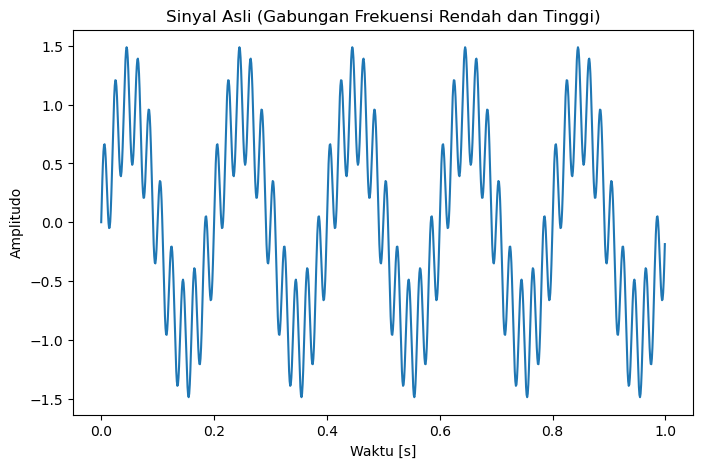

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000 
duration = 1  
t = np.arange(0, duration, 1/fs)  
f_low = 5    # Frekuensi rendah (5 Hz)
f_high = 50  # Frekuensi tinggi (50 Hz)
x_original = np.sin(2 * np.pi * f_low * t) + 0.5 * np.sin(2 * np.pi * f_high * t)

plt.figure(figsize=(8, 5))
plt.plot(t, x_original)
plt.title('Sinyal Asli (Gabungan Frekuensi Rendah dan Tinggi)')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')
plt.show()


In [ ]:
from scipy.signal import butter, filtfilt
def butter_filter(data, cutoff, fs, btype, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

low_cutoff = 20 
high_cutoff = 20  

x_low = butter_filter(x_original, low_cutoff, fs, 'low')  
x_high = butter_filter(x_original, high_cutoff, fs, 'high')  

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.plot(t, x_low)
plt.title('Sinyal Frekuensi Rendah')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')

plt.subplot(2, 1, 2)
plt.plot(t, x_high)
plt.title('Sinyal Frekuensi Tinggi')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()

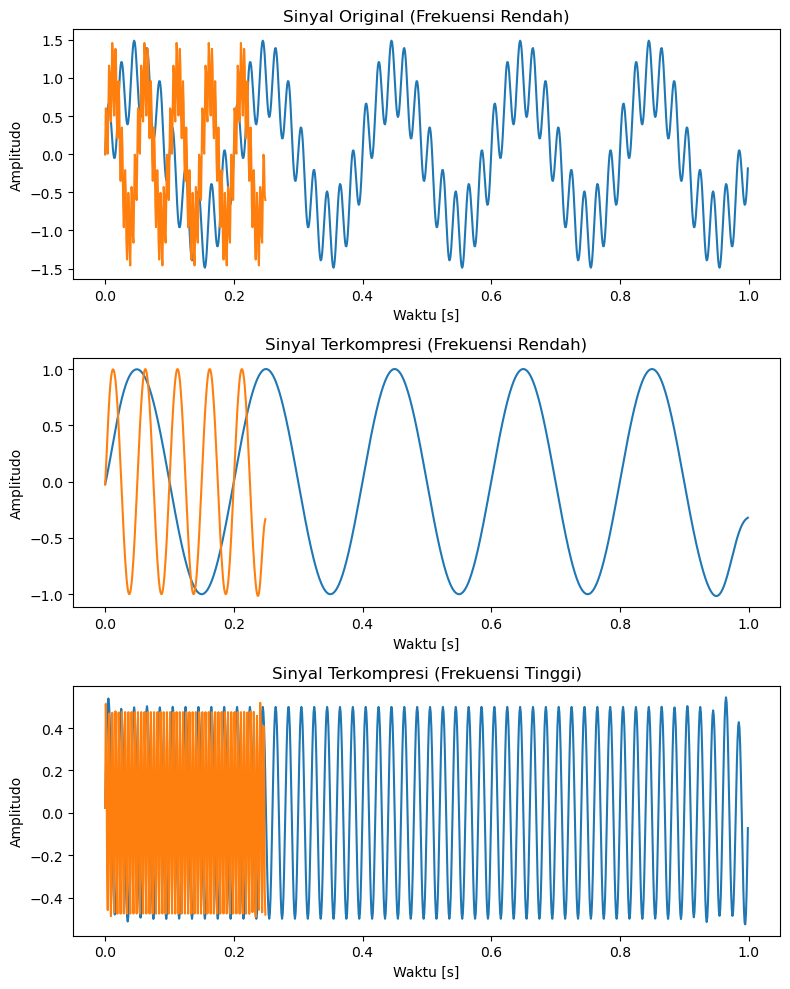

In [5]:
def downsample(x, M):
    return x[::M]

M = 4  
x_original_decimated = downsample(x_original,M)
x_low_decimated = downsample(x_low, M)  
x_high_decimated = downsample(x_high, M)  

plt.figure(figsize=(8, 10))
plt.subplot(3, 1, 1)
plt.plot(t, x_original, t[:len(x_original_decimated)], x_original_decimated)
plt.title('Sinyal Original (Frekuensi Rendah)')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')

plt.subplot(3, 1, 2)
plt.plot(t, x_low, t[:len(x_low_decimated)], x_low_decimated)
plt.title('Sinyal Terkompresi (Frekuensi Rendah)')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')

plt.subplot(3, 1, 3)
plt.plot(t, x_high, t[:len(x_high_decimated)], x_high_decimated)
plt.title('Sinyal Terkompresi (Frekuensi Tinggi)')
plt.xlabel('Waktu [s]')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()


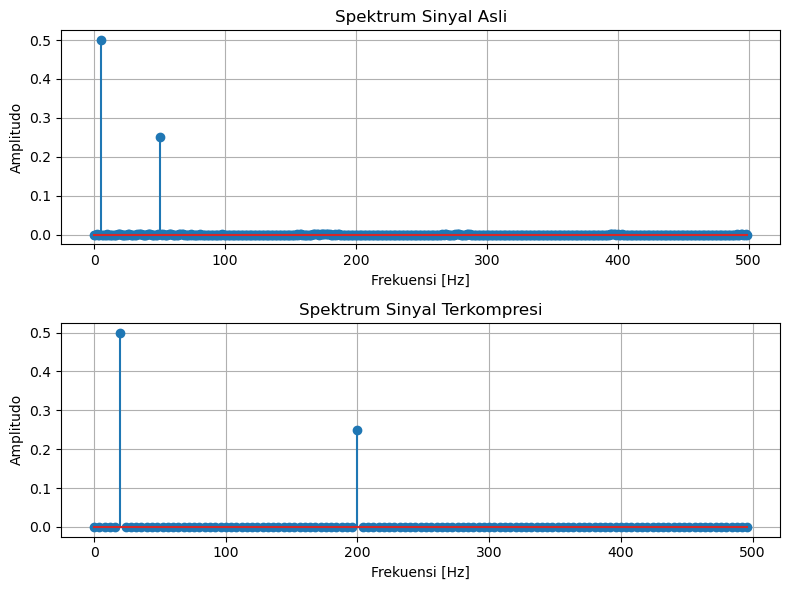

In [7]:
def plot_frequency_domain(signal, fs, title):
    n = len(signal)
    f = np.fft.fftfreq(n, 1/fs)
    X_magnitude = np.abs(np.fft.fft(signal)) / n

    plt.stem(f[:n//2], X_magnitude[:n//2])
    plt.title(title)
    plt.xlabel('Frekuensi [Hz]')
    plt.ylabel('Amplitudo')
    plt.grid(True)

plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plot_frequency_domain(x_original, fs, 'Spektrum Sinyal Asli')

plt.subplot(2, 1, 2)
plot_frequency_domain(x_original_decimated, fs, 'Spektrum Sinyal Terkompresi')

plt.tight_layout()
plt.show()
